In [136]:
#Notebook preferences
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn
import os


rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = False
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
                            recall_score, classification_report, make_scorer,  \
                            confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
                                GradientBoostingClassifier
from imblearn.over_sampling import SMOTE 

In [138]:
df = pd.read_csv('../../Fraud/features.csv', index_col = 0)

In [139]:
df.head()

,purchase_value,age,class,risk_score,lagsecs,purchase_hour,freqdevice,sex_F,sex_M,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE
0,34,39,0,2,4506682.0,22,1,0,1,0,0,1,1,0,0
1,72,32,0,2,5959702.0,18,1,1,0,0,1,0,1,0,0
2,52,44,0,2,662649.0,12,1,1,0,0,1,0,1,0,0
3,22,36,0,2,3062448.0,9,1,0,1,1,0,0,1,0,0
4,32,37,0,2,6541411.0,22,2,0,1,0,0,1,0,1,0


In [165]:
df["immediate_transaction"] = df["lagsecs"].apply(lambda x : 0 if x == 1 else 1)
df_flash = df[df["lagsecs"]==1]
df_nonflash = df[df["lagsecs"]!=1]

In [166]:
X = df_nonflash.drop(columns = ['class'])
y = df_nonflash['class']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 43, test_size=0.2)

In [153]:
lr = LogisticRegression(solver = 'newton-cg')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27392
           1       0.96      0.55      0.70      2831

   micro avg       0.96      0.96      0.96     30223
   macro avg       0.96      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

[[27332    60]
 [ 1286  1545]]


In [154]:
from sklearn.metrics import roc_curve

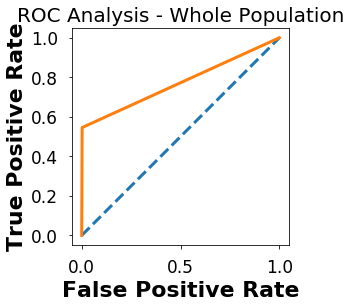

In [156]:
#y_pred = voter_data.turnout_score/100
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# Plot the whole population results.
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot([0, 1], [0, 1], linestyle='--', lw=3)
# plot the roc curve for the model
ax.plot(fpr, tpr, lw=3);
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title('ROC Analysis - Whole Population');

In [143]:
accuracy_score(y_test,y_pred)

0.9524203421235483

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, \
                            recall_score, classification_report, log_loss


classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Recall", "F1Score", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    print("Accuracy: {:.4%}".format(acc))
    
    recall = recall_score(y_test, train_predictions)
    print("Recall: {:.4%}".format(recall))
    
    f1score = f1_score(y_test, train_predictions)
    print("F1Score: {:.4%}".format(f1score))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100,recall*100,
                               f1score*100, ll]], columns=log_cols)
    log = log.append(log_entry)
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 95.2156%
Recall: 54.6097%
F1Score: 68.1357%
Log Loss: 1.3553285269004158
DecisionTreeClassifier
****Results****
Accuracy: 91.4271%
Recall: 60.1201%
F1Score: 56.7807%
Log Loss: 2.9609889699637235
RandomForestClassifier
****Results****
Accuracy: 95.5464%
Recall: 55.2455%
F1Score: 69.9151%
Log Loss: 0.8343815289006925
AdaBoostClassifier
****Results****
Accuracy: 95.7218%
Recall: 54.3271%
F1Score: 70.4051%
Log Loss: 0.6480752089167277
GradientBoostingClassifier
****Results****
Accuracy: 95.7185%
Recall: 54.3271%
F1Score: 70.3890%
Log Loss: 0.15696012074328294
GaussianNB
****Results****
Accuracy: 90.6330%
Recall: 0.0000%
F1Score: 0.0000%
Log Loss: 0.2690715578254643


/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LinearDiscriminantAnalysis
****Results****
Accuracy: 95.2718%
Recall: 54.2918%
F1Score: 68.2656%
Log Loss: 0.32298261195152966
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 84.3232%
Recall: 18.0502%
F1Score: 17.7431%
Log Loss: 4.732690294463719


/Users/nitya/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


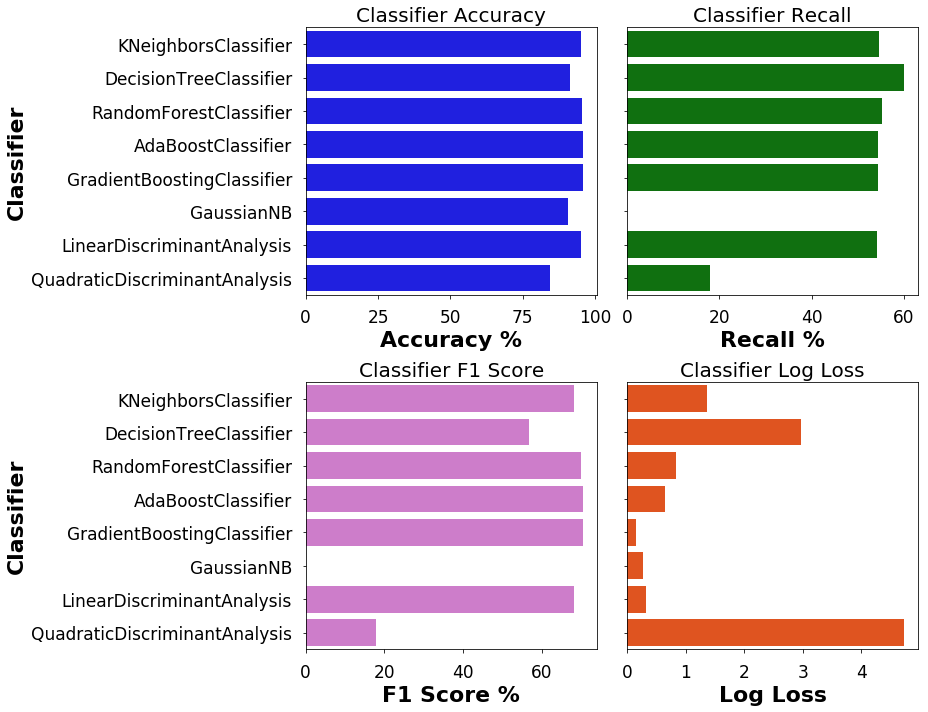

In [9]:
fig, ax = plt.subplots(2,2,figsize = (13,10), sharey = True)
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b",ax = ax[0,0])
ax[0,0].set_xlabel('Accuracy %')
ax[0,0].set_title('Classifier Accuracy')
sns.barplot(x='Recall', y='Classifier', data=log, color="g", ax = ax[0,1])
ax[0,1].set_xlabel('Recall %')
ax[0,1].set_ylabel('')
ax[0,1].set_title('Classifier Recall')
sns.barplot(x='F1Score', y='Classifier', data=log, color="orchid", ax = ax[1,0])
ax[1,0].set_xlabel('F1 Score %')
ax[1,0].set_title('Classifier F1 Score')
sns.barplot(x='Log Loss', y='Classifier', data=log, color="orangered", ax = ax[1,1])
ax[1,1].set_xlabel('Log Loss')
ax[1,1].set_ylabel('')
ax[1,1].set_title('Classifier Log Loss')
plt.subplots_adjust(wspace = 0)
plt.tight_layout()
#plt.savefig('../figures/classifier_comparison.pdf')
plt.show()

In [168]:
from imblearn.over_sampling import SMOTE

In [169]:
sm = SMOTE(random_state=12, ratio = 0.5)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [186]:
# Train a logistic regression model on the upsampled training data.
log_mdl =LogisticRegression(solver = 'newton-cg')
log_mdl.fit(x_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
len(y_train_res[y_train_res==1])

54791

In [184]:
# Determine the model's results on unseen test data.
test_pred = log_mdl.predict(X_test)

In [185]:
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27379
           1       0.00      0.00      0.00      1324

   micro avg       0.95      0.95      0.95     28703
   macro avg       0.48      0.50      0.49     28703
weighted avg       0.91      0.95      0.93     28703

[[27379     0]
 [ 1324     0]]


In [178]:
len(y_test[y_test==1])

1324

In [179]:
test_pred[test_pred==1]

array([1, 1, 1, ..., 1, 1, 1])

In [180]:
X_train.head()

,purchase_value,age,risk_score,lagsecs,purchase_hour,freqdevice,sex_F,sex_M,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,immediate_transaction
62129,17,60,2,6222303.0,6,1,0,1,0,0,1,0,0,1,1
9288,27,18,2,872697.0,14,1,1,0,1,0,0,0,1,0,1
45890,34,25,2,8402520.0,6,1,1,0,1,0,0,1,0,0,1
99724,60,30,2,5404792.0,15,1,0,1,0,0,1,0,1,0,1
14277,30,44,2,7673040.0,6,1,0,1,0,1,0,0,0,0,1


In [181]:
odds_ratio = pd.Series(np.exp(log_mdl.coef_[0]), index=X.columns)
print(odds_ratio.sort_values(ascending=False))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'